Note: many sources were used for putting this Notebook together, often code and comments are included as-is from the original source. Sources are provided ahead of the content that was taken from them. Thank you to the creators of the many wonderful Geopandas resources already in existance!

First a quick tour of Jupyter - be sure to clear all

# First we need to import our libraries

In [53]:
%matplotlib inline

import os

import matplotlib as mpl
import matplotlib.pyplot as plt

# The two statemens below are used mainly to set up a plotting
# default style that's better than the default from matplotlib
import seaborn as sns
plt.style.use('bmh')

from shapely.geometry import Point#, LineString
import pandas as pd
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame
import pyepsg

#from shapely.wkt import loads

#data_pth = "../Data/"

# Let's start by making some simple graphs
Source: https://github.com/geohackweek/tutorial_contents

In [54]:
# Let's check the version of the libraries we're using. Do yours look the same as mine?
mpl.__version__, pd.__version__, gpd.__version__

('2.1.1', '0.22.0', '0.3.0')

In [55]:
# Let's create some data
# Create a GeoSeries from a list of shapely Point objects using the Point constructor
gs = GeoSeries([Point(-120, 45), Point(-121.2, 46), Point(-122.9, 47.5)])
gs

0        POINT (-120 45)
1      POINT (-121.2 46)
2    POINT (-122.9 47.5)
dtype: object

In [56]:
# Check the type and length of our GeoSeries
type(gs), len(gs)

(geopandas.geoseries.GeoSeries, 3)

In [64]:
# Coordinates are of no use unless you know their reference system. Set the projection/crs to WGS 84, aka EPSG 4326
gs.crs = {'init': 'epsg:4326'}

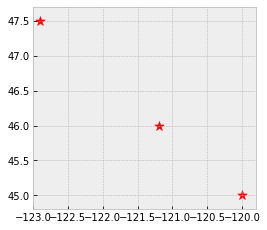

In [69]:
# We can plot our points with the plot function, with some customizations
gs.plot(marker='*', color='red', markersize=100, figsize=(4, 4))

# We limit the bounds to our area, but this will happen by default
plt.xlim([-123, -119.8])
plt.ylim([44.8, 47.7]);

In [72]:
# Let's define a simple dictionary of lists, that we’ll use again later.
data = {'name': ['House', 'Work', 'Pet Store'],
        'lat': [45, 46, 47.5],
        'lon': [-120, -121.2, -122.9]}

In [76]:
# Now we create a list of Point shapely objects out of the X & Y coordinate lists
# Very important - the geometry is what makes the data spatial
geometry = [Point(xy) for xy in zip(data['lon'], data['lat'])]
geometry

In [77]:
# We’ll wrap up by creating a GeoSeries where we explicitly define the index values
# If you change the index to lat or long the graph will look different
# The index is how it orients it in a row format
gs = GeoSeries(geometry, index=data['name'])
gs

House            POINT (-120 45)
Work           POINT (-121.2 46)
Pet Store    POINT (-122.9 47.5)
dtype: object

In [79]:
# Talk about difference between geoseries and geodataframe - above we used a GeoSeries, below we won't
df = pd.DataFrame(data)
df

,lat,lon,name
0,45.0,-120.0,House
1,46.0,-121.2,Work
2,47.5,-122.9,Pet Store


In [80]:
# Now we use the DataFrame and the “list-of-shapely-Point-objects” approach to create a GeoDataFrame. 
# Note the use of two DataFrame attribute columns, which are effectively just two simple Pandas Series.
# Be sure to explain what zip does
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
gdf = GeoDataFrame(df, geometry=geometry)

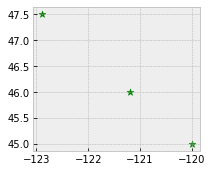

In [52]:
# There’s nothing new to visualize, but this time we’re using the plot method from a GeoDataFrame, not from a GeoSeries. 
gdf.plot(marker='*', color='green', markersize=50, figsize=(3, 3));

# Using Geopandas Datasets
Source: http://geopandas.org/mapping.html

We have now made some point objects, but its more fun to work with real data. Geopandas comes with some datasets that we can use!

In [108]:
# Loading some example data:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Set the index if you like, otherwise it will make a numeric one by default. This will be how the dataframe is sorted
world.set_index('name')

,pop_est,continent,iso_a3,gdp_md_est,geometry
name,,,,,
Afghanistan,28400000.0,Asia,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
Angola,12799293.0,Africa,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
Albania,3639453.0,Europe,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
United Arab Emirates,4798491.0,Asia,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
Argentina,40913584.0,South America,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...
Armenia,2967004.0,Asia,ARM,18770.0,"POLYGON ((43.58274580259273 41.09214325618257,..."
Antarctica,3802.0,Antarctica,ATA,760.4,(POLYGON ((-59.57209469261153 -80.040178725096...
Fr. S. Antarctic Lands,140.0,Seven seas (open ocean),ATF,16.0,"POLYGON ((68.935 -48.62500000000001, 69.58 -48..."
Australia,21262641.0,Oceania,AUS,800200.0,(POLYGON ((145.3979781434948 -40.7925485166058...


In [105]:
# Let's examine the top few rows
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


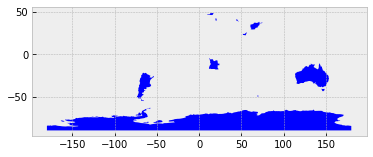

In [111]:
# Let's play with plotting the head and tail 
world.head(10).plot()
# world.tail()
# world.tail(5).plot()

In [112]:
# Exercise

# Set the index to a different column and see how that changes your head and tail tables and plot
# world.head(10).plot()
# world.tail()
# world.tail(5).plot()

In [114]:
# cities is another geopandas dataset. It includes points for the capitals of each country.
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [115]:
# Again we'll look at the top few rows
cities.head()

,name,geometry
0,Vatican City,POINT (12.45338654497177 41.90328217996012)
1,San Marino,POINT (12.44177015780014 43.936095834768)
2,Vaduz,POINT (9.516669472907267 47.13372377429357)
3,Luxembourg,POINT (6.130002806227083 49.61166037912108)
4,Palikir,POINT (158.1499743237623 6.916643696007725)


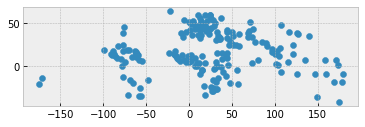

In [93]:
# Plot the cities using the default style
cities.plot()

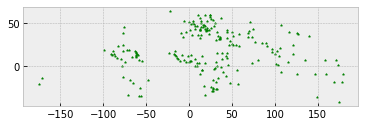

In [86]:
# Plot the cities using custom style
cities.plot(marker='*', color='green', markersize=5);

YOUR TURN #1: Play around with making the city dots different colors and sizes

In [18]:
# Your code here




In [152]:
# We can exclude Antarctica or area by name
#world[(world.pop_est==0)]
#world[(world.name == 'Antarctica')]

world = world[(world.pop_est>0) & (world.name!="Antarctica") & (world.name!="Fr. S. Antarctic Lands")]

In [153]:
# The data came with a gdp_per_cap column, so we can use this data to make a choropleth map!

world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

In [154]:
# Let's take a look at the new column
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",0.000784
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,0.008618
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,...",0.005993
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,...",0.038408
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...,0.014027


In [155]:
# What are the 5 countries with the highest GDP?
world.sort_values('gdp_per_cap', ascending = False).head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
133,833285.0,Asia,Qatar,QAT,91330.0,"POLYGON ((50.81010827006958 24.75474253997138,...",0.109602
97,491775.0,Europe,Luxembourg,LUX,39370.0,"POLYGON ((6.043073357781111 50.12805166279423,...",0.080057
118,4676305.0,Europe,Norway,NOR,276400.0,(POLYGON ((28.16554731620292 71.18547435168051...,0.059106
89,2691158.0,Asia,Kuwait,KWT,149100.0,"POLYGON ((47.9745190773499 29.9758192001485, 4...",0.055404
23,388190.0,Asia,Brunei,BRN,20250.0,"POLYGON ((114.2040165548284 4.525873928236805,...",0.052165


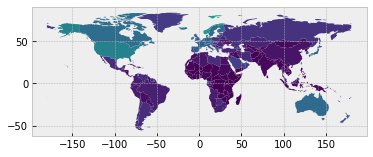

In [156]:
# And plot...
world.plot(column='gdp_per_cap');

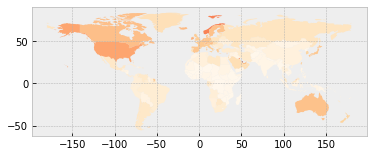

In [166]:
# We can change the style using the cmap (short for color map) property
world.plot(column='gdp_per_cap', cmap='OrRd');

# Try setting the cmap property to YlGn
# Look into other color options

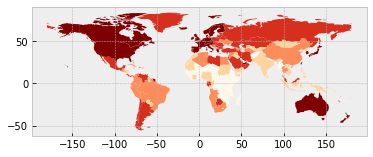

In [167]:
# You can change the default classification scheme
base = world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles');

YOUR TURN #2: The scheme option can be set to 'equal_interval', 'quantiles', or 'fisher_jenks'. 
Try out each one. See the difference?

More info on classification schemes: http://pysal.readthedocs.io/en/latest/library/esda/mapclassify.html

In [24]:
# Your code here




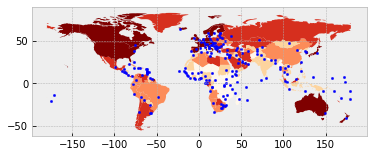

In [169]:
# We can plot the cities on top of our new chropleth map

# Create a variable to hold our choropleth map, call it base
base = world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles');

# Now when you plot the cities, set an ax property to the variable you just created
cities.plot(ax=base, marker='o', color='blue', markersize=5);

# Now you will get them both on the same map

Geopandas is geo-enabled [Pandas](https://pandas.pydata.org/), a Python data science library, so we have everything that comes with Pandas already!

In [177]:
# Add stuff about pandas, make some charts based on GDP


# Managing Projections

Source: http://geopandas.org/projections.html

We saw before how we can set a projection. We can also check a projection and re-project.

In [178]:
# Check original projection
# (it's Platte Carre! x-y are long and lat)
world.crs

{'init': 'epsg:4326'}

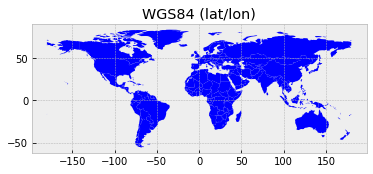

In [179]:
ax = world.plot()
ax.set_title("WGS84 (lat/lon)");

In [181]:
#Set the projection to be the same as another dataset
world = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]
world = world.to_crs(epsg=3395)

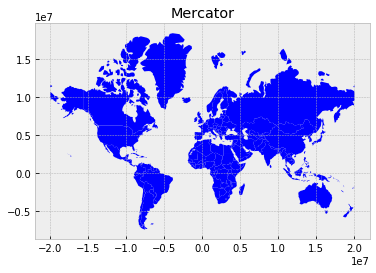

In [182]:
ax = world.plot()
ax.set_title("Mercator");

YOUR TURN #3: Now reproject `cities` to the Mercator projection. Can you plot both the world and cities in the same map in the Mercator projection?

In [31]:
# Your code here
